In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data4.csv")

In [4]:
df.head()

,x,y,z
0,93.945245,329.774413,a
1,85.882617,359.003888,a
2,94.095394,344.874849,a
3,86.593598,347.629245,a
4,85.365487,354.277944,a


<Axes: xlabel='x', ylabel='y'>

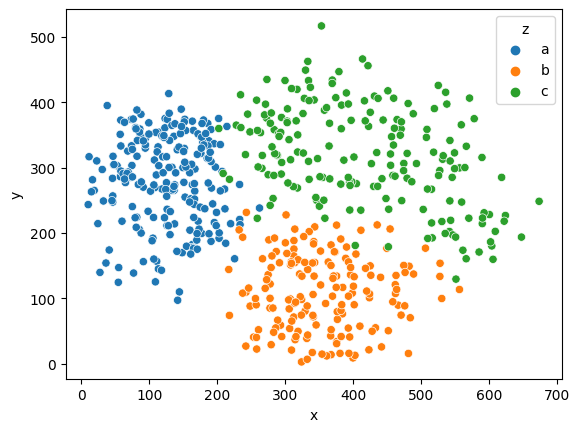

In [5]:
sns.scatterplot(data=df, x='x', y='y', hue='z')

In [6]:
X = df[['x', 'y']].values
y = df["z"] == "c"

In [7]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_pred = pipe.fit(X_train, y_train).predict(X_test)

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X_test)



In [8]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9790


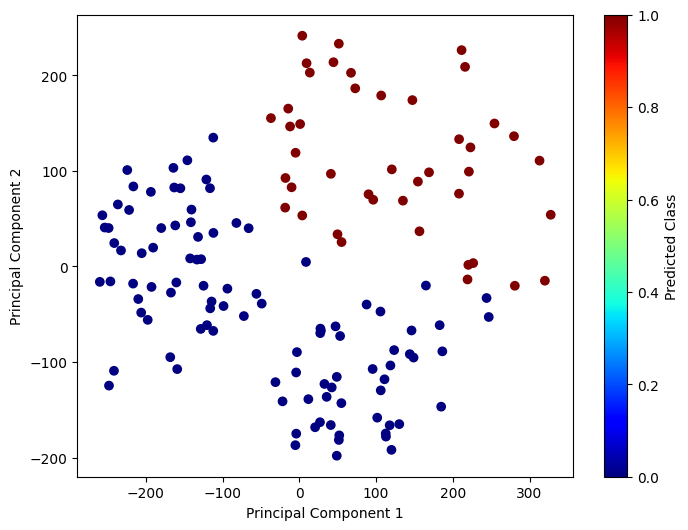

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='jet')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Class")
plt.show()

In [10]:
pipe = Pipeline([
    ('scaler', PolynomialFeatures()),
    ('model', SVC())
])

parameters = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ('linear', 'rbf')
}

grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', PolynomialFeatures()),
                                       ('model', SVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__kernel': ('linear', 'rbf')})

In [11]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

test_score = best_estimator.score(X_test, y_test)

print(f"Best parameters: {best_params}")
print(f"Test Accuracy: {test_score}")

Best parameters: {'model__C': 1, 'model__kernel': 'rbf'}
Test Accuracy: 0.986013986013986


In [14]:
pipe = Pipeline([
    ('scaler', PolynomialFeatures()),
    ('model', LinearSVC())
])

parameters = {
    'model__C': [0.1, 1, 5, 10],
}

grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, cv=5)

grid_search.fit(X_train, y_train)




c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Userpc\AppData\Local\Programs\Python\Python311\Lib\si

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', PolynomialFeatures()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 5, 10]})

In [15]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

test_score = best_estimator.score(X_test, y_test)

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {test_score}")

Best Parameters: {'model__C': 0.1}
Best Accuracy: 0.8601398601398601
